<a href="https://colab.research.google.com/github/AniketAjitTambe/Automated-Essay-Scoring-System-with-Grammar-Scoring/blob/main/Automated_Essay_Scoring_System_with_Grammar_Score_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extract clauses using spacy and use it for regression.

# **Download and Install libraries**

Program Start

In [ ]:
from datetime import datetime
program_start_time = datetime.now()

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 182 kB 74.9 MB/s 
     |████████████████████████████████| 7.6 MB 72.7 MB/s 


In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 1.3 MB 32.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ebda178612033195ad57f5cbc3131f461bfee2f5e43825c7304f65eb6f83c32a
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
!sudo apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,120 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fr

In [ ]:
!sudo pip install jamspell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 5.2 MB/s 
  Created wheel for jamspell: filename=jamspell-0.0.12-cp38-cp38-linux_x86_64.whl size=1345891 sha256=3c4a8c677ae426844847708d94b3586a5404a5e726cd37f8ba485e12d6e98afb
  Stored in directory: /root/.cache/pip/wheels/a0/0e/d3/b645dfed8ed118ee3adad4eb61787ad0e558369f4728ea5a8b
Successfully built jamspell


# **Import libraries and Dependenceies**

In [ ]:
#Import Libraries
import os
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

import string
import re
import time
import datetime
import jamspell
import pickle
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset, random_split

import random
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline


import tensorflow as tf
import transformers as ppb
from transformers import BertForSequenceClassification
from transformers import AdamW
from transformers import BertConfig
from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup

import spacy.cli 
spacy.cli.download("en")
from difflib import SequenceMatcher

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
def print_banner(str):
  print("=====================================================================================")
  print(str)
  print("=====================================================================================")

def print_dashline():
  print("=====================================================================================")

def score_range(a):
  if a>10:
    return 10;
  elif a<0:
    return 0
  else:
    return a

def clean_essay(string):
  result = re.sub(r' @',' ',string)
  return result

In [ ]:
#Version number
version_number = "F"
version = "_v"+str(version_number)
print("Version Number : ",version)

Version Number :  _vF


In [ ]:
output_dir = '/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models'

In [ ]:

os.path.isdir(output_dir+'/Grammar_Score_Model/')

True

In [ ]:
#Want to save newly trainned  Models?
structure_epochs = 70
grammar_epochs = 4
gsm_output_dir = output_dir+'/Grammar_Score_Model/'
ssm_output_dir = output_dir+'/Structure_Score_Model/'

if not os.path.isdir(ssm_output_dir) :
  structure_save_option = 1
else:
  structure_save_option = 0

if not os.path.isdir(gsm_output_dir) :
  grammar_save_option = grammar_logreg_save_option = 1
else:
  grammar_save_option = grammar_logreg_save_option = 0

print(structure_save_option,",",grammar_save_option,",",grammar_logreg_save_option)


#model names
ssm_model_name = "ssm_model"+version
gsm_gc_model_name = "gsm_gc_model"+version
gsm_reg_model_name = "gsm_reg_model"+version

1 , 1 , 1


In [ ]:
#To use CUDA
#import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


# **Data Set Preparation and Processing**

In [ ]:
#DataSet Preparation with normalised marks
#For Data Set
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


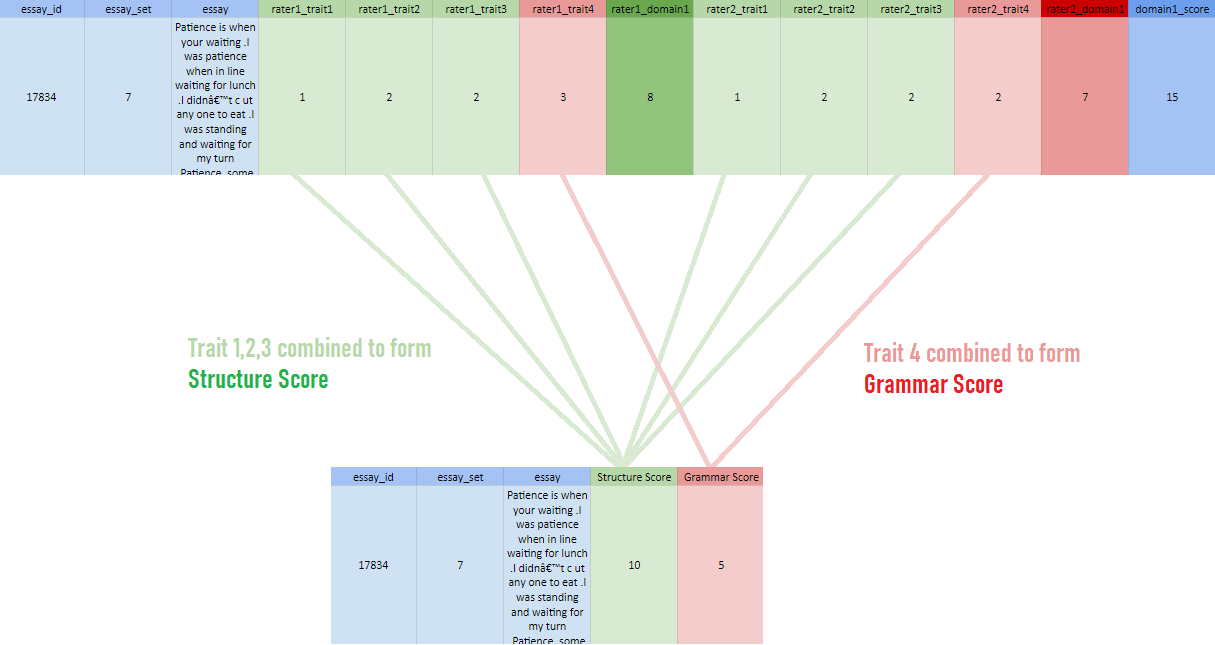

In [ ]:
#====================Read Data Set from Drive===================================#
#Read Input

data_set_path = '/content/drive/MyDrive/Colab Notebooks/AES/Data Set'

asap_aes_ds = pd.read_csv(data_set_path+'/ASAP_AES/asap_aes_train_test_dataset.csv')
asap_aes_ds

,essay_id,essay_set,essay,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,...,rater2_domain1,domain1_score,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,17834,7,Patience is when your waiting .I was patience ...,NaN,NaN,NaN,NaN,1,2,2,...,7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17836,7,"I am not a patience person, like I can’t sit i...",NaN,NaN,NaN,NaN,1,1,2,...,7,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17837,7,One day I was at basketball practice and I was...,NaN,NaN,NaN,NaN,1,2,2,...,8,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17838,7,I going to write about a time when I went to t...,NaN,NaN,NaN,NaN,2,2,2,...,9,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17839,7,It can be very hard for somebody to be patient...,NaN,NaN,NaN,NaN,1,2,2,...,6,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18936,7,"One time when I was patient, I got rewarded. J...",NaN,NaN,NaN,NaN,2,2,2,...,7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,18937,7,My mom and I were were on are way to are house...,NaN,NaN,NaN,NaN,2,2,1,...,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,18938,7,One time I got birthday money I wanted to buy ...,NaN,NaN,NaN,NaN,2,2,2,...,8,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,18939,7,"Patience is, in definition, being understandin...",NaN,NaN,NaN,NaN,1,1,1,...,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#====================Read Data Set from Drive===================================#
#Read Input

asap_aes_ds = pd.read_csv(data_set_path+'/ASAP_AES/asap_aes_train_test_dataset.csv')

#===================Select/Create required features from Data Set===============#
#Selecting Required columns
#data_set = data_set.head()
asap_aes_ds = asap_aes_ds.iloc[:,[0,1,2,7,8,9,10,11,14,15,16,17,18,19]]

#Structure Score sum
asap_aes_ds['structure_score'] = asap_aes_ds[['rater1_trait1','rater1_trait2','rater1_trait3','rater2_trait1','rater2_trait2','rater2_trait3']].sum(axis=1)
asap_aes_ds['structure_score'] = asap_aes_ds['structure_score'].apply(lambda x : int(x*10/18))
#Grammar Score sum
asap_aes_ds['grammar_score'] = asap_aes_ds[['rater1_trait4','rater2_trait4']].sum(axis=1)
asap_aes_ds['grammar_score'] = asap_aes_ds['grammar_score'].apply(lambda x : int(x*10/6))

#Drop other columns
asap_aes_ds.drop(["rater1_trait4","rater2_trait4","rater1_domain1","rater2_domain1","domain1_score",'rater1_trait1','rater1_trait2','rater1_trait3','rater2_trait1','rater2_trait2','rater2_trait3','rater1_domain1','rater2_domain1','domain1_score'],axis=1,inplace = True)

#Data Set Ready

#data_set
asap_aes_ds

,essay_id,essay_set,essay,structure_score,grammar_score
0,17834,7,Patience is when your waiting .I was patience ...,5,8
1,17836,7,"I am not a patience person, like I can’t sit i...",5,5
2,17837,7,One day I was at basketball practice and I was...,6,6
3,17838,7,I going to write about a time when I went to t...,6,8
4,17839,7,It can be very hard for somebody to be patient...,5,6
...,...,...,...,...,...
995,18936,7,"One time when I was patient, I got rewarded. J...",6,6
996,18937,7,My mom and I were were on are way to are house...,4,3
997,18938,7,One time I got birthday money I wanted to buy ...,6,8
998,18939,7,"Patience is, in definition, being understandin...",3,6


In [ ]:
data_set = asap_aes_ds
data_set

,essay_id,essay_set,essay,structure_score,grammar_score
0,17834,7,Patience is when your waiting .I was patience ...,5,8
1,17836,7,"I am not a patience person, like I can’t sit i...",5,5
2,17837,7,One day I was at basketball practice and I was...,6,6
3,17838,7,I going to write about a time when I went to t...,6,8
4,17839,7,It can be very hard for somebody to be patient...,5,6
...,...,...,...,...,...
995,18936,7,"One time when I was patient, I got rewarded. J...",6,6
996,18937,7,My mom and I were were on are way to are house...,4,3
997,18938,7,One time I got birthday money I wanted to buy ...,6,8
998,18939,7,"Patience is, in definition, being understandin...",3,6


In [ ]:
#analysis_set = data_set

#Dataframe to save test set of structure score module
ss_test_x = pd.DataFrame()
ss_test_y = pd.DataFrame()

#Dataframe to save test set of grammar score module
gs_test_x = pd.DataFrame()
gs_test_y = pd.DataFrame()

# **AES Planned System Architecture**

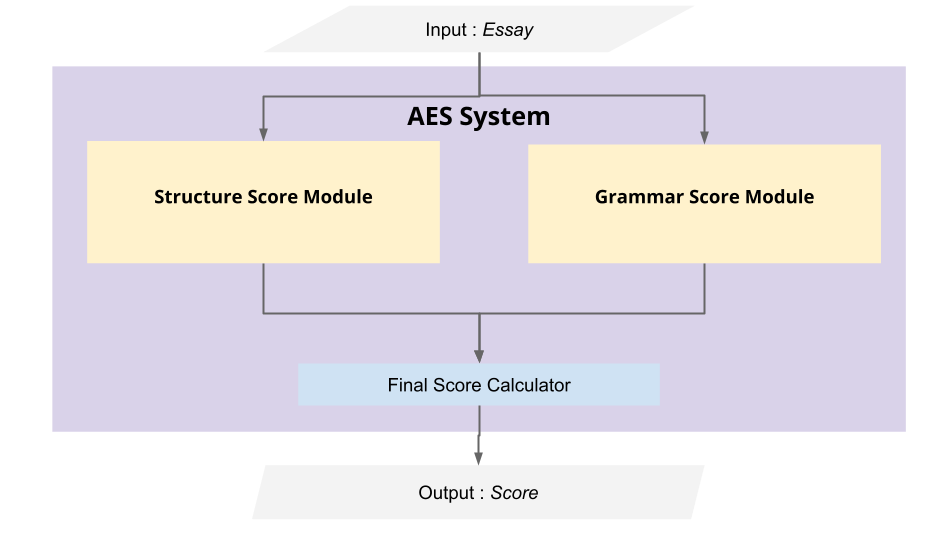

## **Structure Score Module**

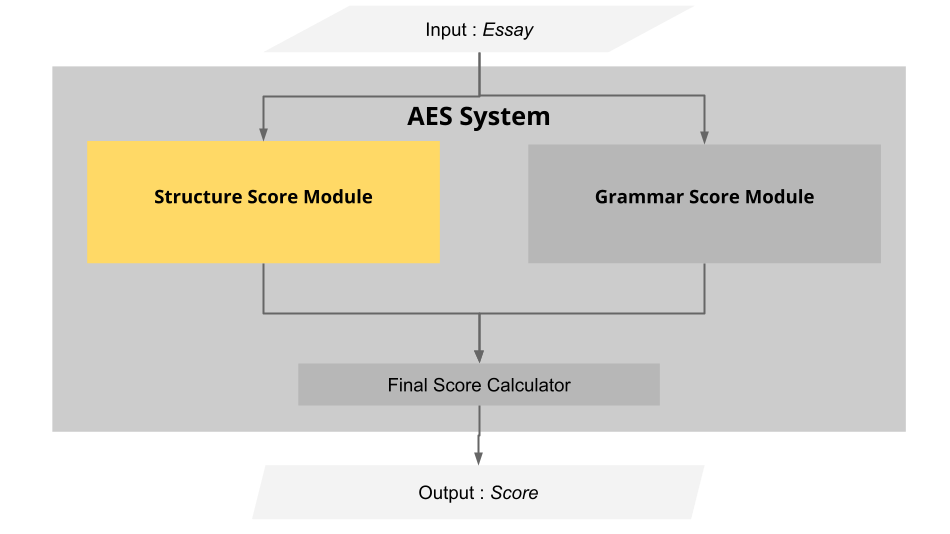

### ***Training Structure Score Module***

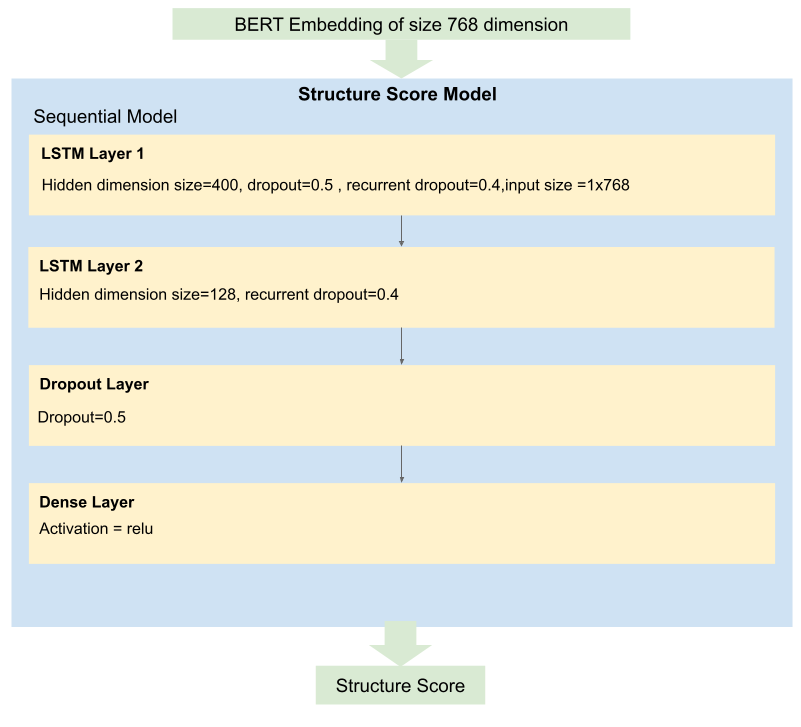

In [ ]:
#Creating LSTM Model
#from keras.layers import Embedding, Input, LSTM, Dense, Dropout, Lambda, Flatten, Bidirectional, Conv2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.models import Sequential,Model, load_model, model_from_config
import keras.backend as K

def get_model(Hidden_dim1=400, Hidden_dim2=128, return_sequences = True, dropout=0.5, recurrent_dropout=0.4, input_size=768, activation='relu', bidirectional = True):
    #Define the model
    model = Sequential()
    
    #Dropout helps in avoiding Overfitting
    #Input size is 768 because BERT Embeddings are of size 768 dimesnions for each essay.
    #Return Sequences return the hidden state output for each input time step
    if bidirectional:
        #First LSTM Layer : Hidden Dimension Layer
        model.add(Bidirectional(LSTM(Hidden_dim1,return_sequences=return_sequences , dropout=0.4, recurrent_dropout=recurrent_dropout), input_shape=[1, input_size]))
        #Second LSTM Layer : Hidden Dimension Layer
        model.add(Bidirectional(LSTM(Hidden_dim2, recurrent_dropout=recurrent_dropout)))
    else:
        #First LSTM Layer : Hidden Dimension Layer
        model.add(LSTM(Hidden_dim1, dropout=0.4, recurrent_dropout=recurrent_dropout, input_shape=[1, input_size], return_sequences=return_sequences))
        #Second LSTM Layer : Hidden Dimension Layer
        model.add(LSTM(Hidden_dim2, recurrent_dropout=recurrent_dropout))
    #Third Layer : Dropout Layer
    model.add(Dropout(dropout))
    #Fourth Layer : Dense Layer
    model.add(Dense(1, activation=activation))
    #Compile Model generated above
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    #Summary of Model Generated
    model.summary()
    return model

In [ ]:
#Set epochs
epochs = structure_epochs
print("Epoch Value for Structure : "+str(epochs))

Epoch Value for Structure : 70


In [ ]:
#structure model save path+name
save_path_string = ssm_output_dir+ssm_model_name+'.h5'
print("Trained Model will be saved at path : \n"+save_path_string)

Trained Model will be saved at path : 
/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Structure_Score_Model/ssm_model_vF.h5


#### ***Training & Testing***

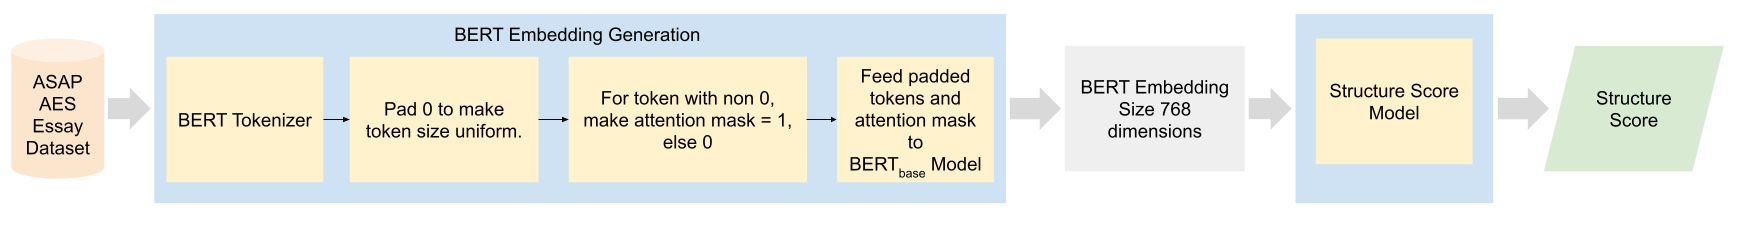

In [ ]:
## Sets experiment BERT
import time
import torch
import transformers as ppb
#import warnings

#Set number from ASAP AES Data Set
set_count = 7

#List to save score
all_sets_score = []

#=====================Iterate through data set==================================#
#Iterate through required Data Set
for s in [data_set]:
  #=========================Intial Set up=======================================#
  print("\n--------SET {}--------\n".format(set_count))
  #Assign Data Set to x, all features
  X = s

  #Assign Target Data Set feature i.e Structure Socre , to y
  y = s['structure_score']

  #KFold for cross validation. Split X accordingly for cross validation.
  cv = KFold(n_splits=3, shuffle=True)
  cv_data = cv.split(X)

  #List to store result
  results = []
  prediction_list = []

  #Intiaite fold count
  fold_count =1

  #Use cuda
  cuda = torch.device('cuda')

  #========================Initialise BERT Model================================#
  # For BERT embeddings:
  model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
  # Load pretrained BERT model/tokenizer
  tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
  model = model_class.from_pretrained(pretrained_weights)
  #=============================================================================#

  #Using cuda GPU over train/test split
  with torch.cuda.device(cuda):
    for traincv, testcv in cv_data:
      torch.cuda.empty_cache()
      print("\n--------Fold {}--------\n".format(fold_count))
      # get the train and test split from the dataset,using the KFold validation created.
      X_train, X_test, y_train, y_test = X.iloc[traincv], X.iloc[testcv], y.iloc[traincv], y.iloc[testcv]

      #Assign value to global dataframe for final testing
      ss_test_x = X_test
      ss_test_y = y_test

      #Get required column from the train-test split data i.e. essay
      
      train_essays = X_train['essay'].apply(lambda x: clean_essay(x).lower())
      #print("y_train",y_train)
      test_essays = X_test['essay'].apply(lambda x: clean_essay(x).lower())
      
      #List to store sentences, their token, embeddings
      sentences = []
      tokenize_sentences = []
      train_bert_embeddings = []

      #=================Get BERT Embeddings for train set=======================#
      #Tokenize train and test essays
      tokenized_train = train_essays.apply((lambda x: tokenizer.encode(x, add_special_tokens=True ,max_length=200)))
      tokenized_test = test_essays.apply((lambda x: tokenizer.encode(x, add_special_tokens=True ,max_length=200)))


      #TRAIN SET

      #Get max len of token in tokenized_train
      max_len = 0
      for i in tokenized_train.values:
        if len(i) > max_len:
          max_len = len(i)

      #Make each essay's token array equal length by padding 0
      padded_train = np.array([i + [0]*(max_len-len(i)) for i in tokenized_train.values])

      #In padded_train , where it is not 0 , make attention mask 1 else 0
      attention_mask_train = np.where(padded_train != 0, 1, 0)


      #torch.tensor() to create a tensor as data is already present.
      train_input_ids = torch.tensor(padded_train)
      train_attention_mask = torch.tensor(attention_mask_train)

      #Send gerated tensors to model(BERT) and get hidden states for train features
      with torch.no_grad():
        last_hidden_states_train = model(train_input_ids, attention_mask=train_attention_mask)

      #=================Final BERT Embedding for Train Set======================#
      #Actual BERT Embedding vector of input sentences for TEST SET  
      train_features = last_hidden_states_train[0][:,0,:].numpy()
      #=========================================================================#

      ## TEST SET

      #Get max len of token in tokenized_test
      max_len = 0
      for i in tokenized_test.values:
        if len(i) > max_len:
          max_len = len(i)
      
      #Make them equal length by padding 0
      padded_test = np.array([i + [0]*(max_len-len(i)) for i in tokenized_test.values])

      #In padded_test , where it is not 0 , make attention mask 1 else 0
      attention_mask_test = np.where(padded_test != 0, 1, 0)

      #torch.tensor() to create a tensor as data is already present.
      test_input_ids = torch.tensor(padded_test)  
      test_attention_mask = torch.tensor(attention_mask_test)

      #Send gerated tensors to model and get test features
      with torch.no_grad():
        last_hidden_states_test = model(test_input_ids, attention_mask=test_attention_mask)

      #=================Final BERT Embedding for Test =Set======================#      
      #Actual BERT Embedding vector of input sentences for TRAINING SET
      test_features = last_hidden_states_test[0][:,0,:].numpy()
      #=========================================================================#


#===============================================================================#
      #===============Prepare train set for training the LSTM Model============#
      #Pull shape of train and test features
      train_x,train_y = train_features.shape
      test_x,test_y = test_features.shape

      #reshape into vectors
      trainDataVectors = np.reshape(train_features,(train_x,1,train_y))
      testDataVectors = np.reshape(test_features,(test_x,1,test_y))

      #Initiate Structure Score (Sequential) Model
      structure_score_model = get_model(bidirectional=True)

      #Fit model i.e. Train the Model
      structure_score_model.fit(trainDataVectors, y_train, batch_size=128, epochs=epochs)
      #Predictions of Trained Model
      y_pred = structure_score_model.predict(testDataVectors)

#===============================================================================#
      #===========================Evaluate the trained Model====================#
      #Round it up to even number of decimals
      y_pred = np.around(y_pred)
      #y_pred.dropna()

      #Replace NaN with 0
      np.nan_to_num(y_pred)
      
      a = y_pred
      y_pred_new = []
      for i in a:
        y_pred_new.append(score_range(round(i[0])))
      y_pred = np.array(y_pred_new)

      # evaluate the model i.e Calculate Quadratic Weighted kappa Score
      b = y_test.values
      result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
      print("Kappa Score: {}".format(result))
      results.append(result)

      #Increase fold count
      fold_count +=1

      #Clear Session
      import tensorflow as tf
      tf.keras.backend.clear_session()

  all_sets_score.append(results)
  print("Average kappa score value is : {}".format(np.mean(np.asarray(results))))


--------SET 7--------



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max 


--------Fold 1--------



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 800)           3740800   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              951296    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 4,692,353
Trainable params: 4,692,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
6/6 [==============================

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 800)           3740800   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              951296    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 4,692,353
Trainable params: 4,692,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
6/6 [==============================

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 800)           3740800   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              951296    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 4,692,353
Trainable params: 4,692,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
6/6 [==============================

#### ***Evaluation Score***

In [ ]:
print("Average kappa score value is : {}".format(np.mean(np.asarray(results))))

Average kappa score value is : 0.7414660827392364


In [ ]:
#Function to get essay score for an input essay using above model
def get_essay_structure_score(essay):
  df = pd.Series(clean_essay(essay).lower())
  #Tokenize train and test essays
  tokenized = df.apply((lambda x: tokenizer.encode(x, add_special_tokens=True ,max_length=200)))
  max_len = 0
  for i in tokenized.values:
    if len(i) > max_len:
      max_len = len(i)

  #Make them equal length by padding 0
  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

  #In padded , where it is not 0 , make attention mask 1 else 0
  attention_mask = np.where(padded != 0, 1, 0)


  #torch.tensor() to create a tensor as data is already present.
  t_input_ids = torch.tensor(padded)
  t_attention_mask = torch.tensor(attention_mask)

  #Send gerated tensors to model and get train features
  with torch.no_grad():
    last_hidden_states_train = model(t_input_ids, attention_mask=t_attention_mask)
  features = last_hidden_states_train[0][:,0,:].numpy()
  DataVectors = np.reshape(features,(1,1,768))
  score = score_range(round(structure_score_model.predict(DataVectors)[0][0]))
  return score

In [ ]:
structure_score_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 800)           3740800   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              951296    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 4,692,353
Trainable params: 4,692,353
Non-trainable params: 0
_________________________________________________________________


#### ***Save the Model***

In [ ]:
save_path_string

'/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Structure_Score_Model/ssm_model_vF.h5'

In [ ]:
#Save newly trained module if set to
#structure_save_option = 1
if structure_save_option == 1:

  #Path to save models
  
  #Structure Score Sequential Model save 
  structure_score_model.save(save_path_string)
  print_banner("Model Succesfully Saved at path : \n"+save_path_string)

if structure_save_option == 0:
  print("STRUCTURE save option not selected.")

STRUCTURE save option not selected.


In [ ]:
essay = """One day I was at basketball practice and I was running has with my team when I was getting really really thirsty do after we did are suicides (a running exercise)I asked coach if we could go get some drinks coach said â€œafter are double drible down and back exerciseâ€ @CAPS1 I did the exercise and we all rushed to the drinking fountain and I was at the end of an @NUM1 girl line .I waited and waited until finally there I was faced with that drinking fountain when one girl says â€œ can I have a drink thank youâ€ and all I could do if be stunned..Thats were I heard a bright ladys lets go!â€ I was @CAPS1 mad but I quickly took a @NUM2 second drink of water and rushed over to coach and now Iâ€™m the fisst one alot and I take long drunks do my teammates call me a fish!"""
print("STRUCTURE ANALYSIS\nStructure score for essay using Trained Model is : "+str(get_essay_structure_score(essay)))

1/1 [==============================] - 0s 220ms/step
STRUCTURE ANALYSIS
Structure score for essay using Trained Model is : 8


### ***Functions of Structure Score Module***

In [ ]:
epochs = structure_epochs

save_path_string = ssm_output_dir+ssm_model_name+'.h5'

#========================Initialise BERT and Saved Model================================#
# For BERT embeddings:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
# Load pretrained BERT model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

#Load Saved Model
new_structure_score_model = tf.keras.models.load_model(save_path_string)
print_banner("Succesfully Loaded Model : \n"+save_path_string)
#=============================================================================#

def demo_essay_structure_score(essay , structure_score_model = new_structure_score_model,tokenizer = tokenizer , model = model,print_index = 0):
  
  df = pd.Series(clean_essay(essay).lower())
  #Tokenize train and test essays
  tokenized = df.apply((lambda x: tokenizer.encode(x, add_special_tokens=True ,max_length=200)))
  max_len = 0
  for i in tokenized.values:
    if len(i) > max_len:
      max_len = len(i)

  #Make them equal length by padding 0
  padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

  #In padded , where it is not 0 , make attention mask 1 else 0
  attention_mask = np.where(padded != 0, 1, 0)


  #torch.tensor() to create a tensor as data is already present.
  t_input_ids = torch.tensor(padded)
  t_attention_mask = torch.tensor(attention_mask)

  #Send gerated tensors to model and get train features
  with torch.no_grad():
    last_hidden_states_train = model(t_input_ids, attention_mask=t_attention_mask)
  features = last_hidden_states_train[0][:,0,:].numpy()
  DataVectors = np.reshape(features,(1,1,768))
  score = score_range(round(structure_score_model.predict(DataVectors)[0][0]))
  if print_index == 1:
    print("ss:",data_set.index)
  # return score_range(round(score[0][0]))
  return score

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Succesfully Loaded Model : 
/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Structure_Score_Model/ssm_model_vF.h5


In [ ]:
new_structure_score_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 800)           3740800   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              951296    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 4,692,353
Trainable params: 4,692,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
essay = """Patience is when your waiting .I was patience when in line waiting for lunch .I didn’t c ut any one to eat .I was standing and waiting for my turn .Patience ,some people don’t have it .Lots of people just cut or yell at you because they don’t have any patience. Sometimes people will push you out of their way .They only do that because they don’t have patience at all. Patience is what people need .People need patience because lots o f feelings get hurt .Everyone should have patience."""
print("ESSAY :\n"+essay)

ESSAY :
Patience is when your waiting .I was patience when in line waiting for lunch .I didn’t c ut any one to eat .I was standing and waiting for my turn .Patience ,some people don’t have it .Lots of people just cut or yell at you because they don’t have any patience. Sometimes people will push you out of their way .They only do that because they don’t have patience at all. Patience is what people need .People need patience because lots o f feelings get hurt .Everyone should have patience.


In [ ]:
print("STRUCTURE ANALYSIS\nStructure score from SAVED MODEL essay is : "+str(demo_essay_structure_score(essay)))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


1/1 [==============================] - 1s 769ms/step
STRUCTURE ANALYSIS
Structure score from SAVED MODEL essay is : 3


## **Grammar Score Module**

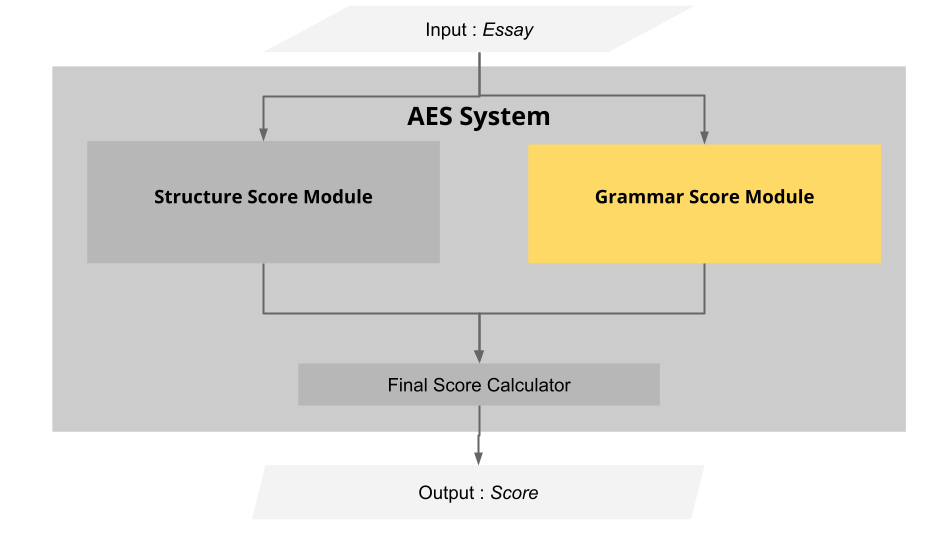

### ***Training Grammar Score Module***

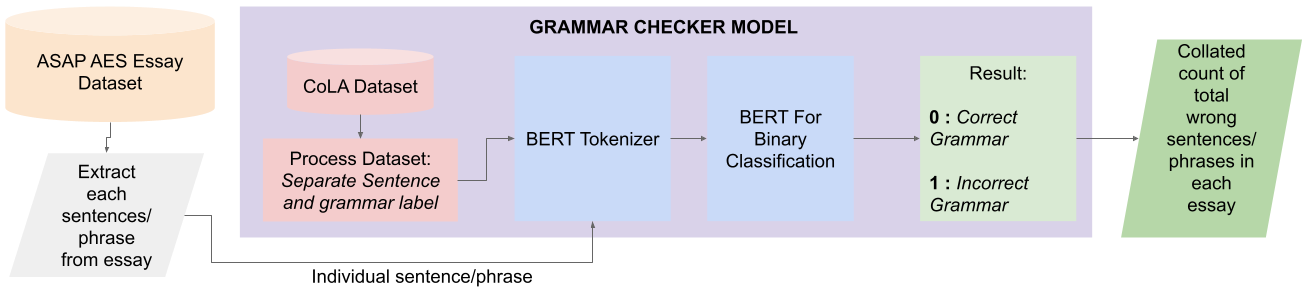

Preparing Data Set

In [ ]:
#Read CoLA Dataset training data
df = pd.read_csv(data_set_path+'/CoLA/in_domain_train.tsv', delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
df.head(10)

,sentence_source,label,label_notes,sentence
0,gj04,1,NaN,"Our friends won't buy this analysis, let alone..."
1,gj04,1,NaN,One more pseudo generalization and I'm giving up.
2,gj04,1,NaN,One more pseudo generalization or I'm giving up.
3,gj04,1,NaN,"The more we study verbs, the crazier they get."
4,gj04,1,NaN,Day by day the facts are getting murkier.
5,gj04,1,NaN,I'll fix you a drink.
6,gj04,1,NaN,Fred watered the plants flat.
7,gj04,1,NaN,Bill coughed his way out of the restaurant.
8,gj04,1,NaN,We're dancing the night away.
9,gj04,1,NaN,Herman hammered the metal flat.


Tokenize Input for BERT Classificatin of Grammatical Correctness

In [ ]:
# Get the lists of sentences and their labels.
sentences = df.sentence.values
labels = df.label.values

Create BERT Token and Attention Mask for dataset's sentences

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

input_ids = []
attention_masks = []

# For every sentence , tokenize sentence and create attention mask fo each
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

#=================Final BERT Embedding for Set==================================#
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Loading BERT tokenizer...


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Data Loader for Train and Validation Set

In [ ]:
#Dividing Data set into train test set
#from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

# Batch Size for DataLoader
batch_size = 32

# Create the DataLoaders  
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

#Read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

print("Data Loader Created for Train and Validation Set.")

7,695 training samples
  856 validation samples
Data Loader Created for Train and Validation Set.


Set Epoch Value

In [ ]:
#Set Epochs to train grammar model
epochs = grammar_epochs
print("Epoch Value for Grammar : "+str(epochs))

Epoch Value for Grammar : 4


Initiate BERT Model

In [ ]:
#Load BertForSequenceClassification

#from transformers import BertForSequenceClassification, AdamW, BertConfig

#Load BertForSequenceClassification
# The number of output labels--2 for binary classification.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2,    
    output_attentions = False, 
    output_hidden_states = False, 
)

#Run the model on the GPU.
model.cuda()

#AdamW for optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

#Helper function for formatting elapsed times as hh:mm:ss
#import time
#import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Training the Model for Grammar Correctness prediction and perform cross validation on it.



In [ ]:
#Training Model

#import random
#import numpy as np

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

#To Store training Stats
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training Begins
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode.
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # `batch` contains three pytorch tensors:

        #   [0]: input ids 
        b_input_ids = batch[0].to(device)
        #   [1]: attention masks
        b_input_mask = batch[1].to(device)
        #   [2]: labels 
        b_labels = batch[2].to(device)

        #clear any previously calculated gradients before backward pass.
        model.zero_grad()        

        # Perform a forward pass
        l = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches
        total_train_loss += l["loss"]

        # Perform a backward pass to calculate the gradients.
        l["loss"].backward()

        # Clip the norm of the gradients to 1.0 to prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation Begins
    # ========================================
    # After the completion of each training epoch, measure performance on validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # `batch` contains three pytorch tensors:

        #   [0]: input ids 
        b_input_ids = batch[0].to(device)
        #   [1]: attention masks
        b_input_mask = batch[1].to(device)
        #   [2]: labels
        b_labels = batch[2].to(device)
 
        with torch.no_grad():                    
            l1 = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += l1["loss"]

        logits = l1["logits"].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:14.
  Batch    80  of    241.    Elapsed: 0:00:28.
  Batch   120  of    241.    Elapsed: 0:00:42.
  Batch   160  of    241.    Elapsed: 0:00:56.
  Batch   200  of    241.    Elapsed: 0:01:09.
  Batch   240  of    241.    Elapsed: 0:01:23.

  Average training loss: 0.50
  Training epcoh took: 0:01:23

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.42
  Validation took: 0:00:03

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:14.
  Batch    80  of    241.    Elapsed: 0:00:27.
  Batch   120  of    241.    Elapsed: 0:00:41.
  Batch   160  of    241.    Elapsed: 0:00:55.
  Batch   200  of    241.    Elapsed: 0:01:08.
  Batch   240  of    241.    Elapsed: 0:01:22.

  Average training loss: 0.30
  Training epcoh took: 0:01:22

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.52
  Validation took: 0:00:03

======== Epoch 3 / 4 ========
Training...
 

Testing model on dataset's Out of domain set

In [ ]:
# Load the CoLA dataset for testing.
df = pd.read_csv(data_set_path+'/CoLA/out_of_domain_dev.tsv', delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
df.head(10)

,sentence_source,label,label_notes,sentence
0,clc95,1,NaN,Somebody just left - guess who.
1,clc95,1,NaN,"They claimed they had settled on something, bu..."
2,clc95,1,NaN,"If Sam was going, Sally would know where."
3,clc95,1,NaN,"They're going to serve the guests something, b..."
4,clc95,1,NaN,She's reading. I can't imagine what.
5,clc95,1,NaN,John said Joan saw someone from her graduating...
6,clc95,0,*,John ate dinner but I don't know who.
7,clc95,0,*,"She mailed John a letter, but I don't know to ..."
8,clc95,1,NaN,I served leek soup to my guests.
9,clc95,1,NaN,I served my guests.


Tokenize Test Set for prediction

In [ ]:
#import pandas as pd

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Using Model to make prediction of Grammar Correctness

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  #Store no gradient
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)


print('    DONE.')
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Predicting labels for 516 test sentences...
    DONE.
Positive samples: 354 of 516 (68.60%)


Evaluating Model for Grammar Prediction using OG Labels and Predicted Labels

In [ ]:
#from sklearn.metrics import matthews_corrcoef
#from sklearn.metrics import accuracy_score

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

  # Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Calculating Matthews Corr. Coef. for each batch...
Total MCC: 0.519


Save Trained Model

In [ ]:
gsm_output_dir

'/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Grammar_Score_Model/'

In [ ]:
#import os
#grammar_save_option=1

if grammar_save_option == 1:

  # Create output directory if needed
  if not os.path.exists(gsm_output_dir):
      os.makedirs(gsm_output_dir)

  print("Saving model to %s" % gsm_output_dir)

  # Save a trained model
  model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
  model_to_save.save_pretrained(gsm_output_dir)
  tokenizer.save_pretrained(gsm_output_dir)

if grammar_save_option == 0:
  print("GRAMMAR Model save option not selected.")

GRAMMAR Model save option not selected.


Feature Generation for GGrammar Score Prediction

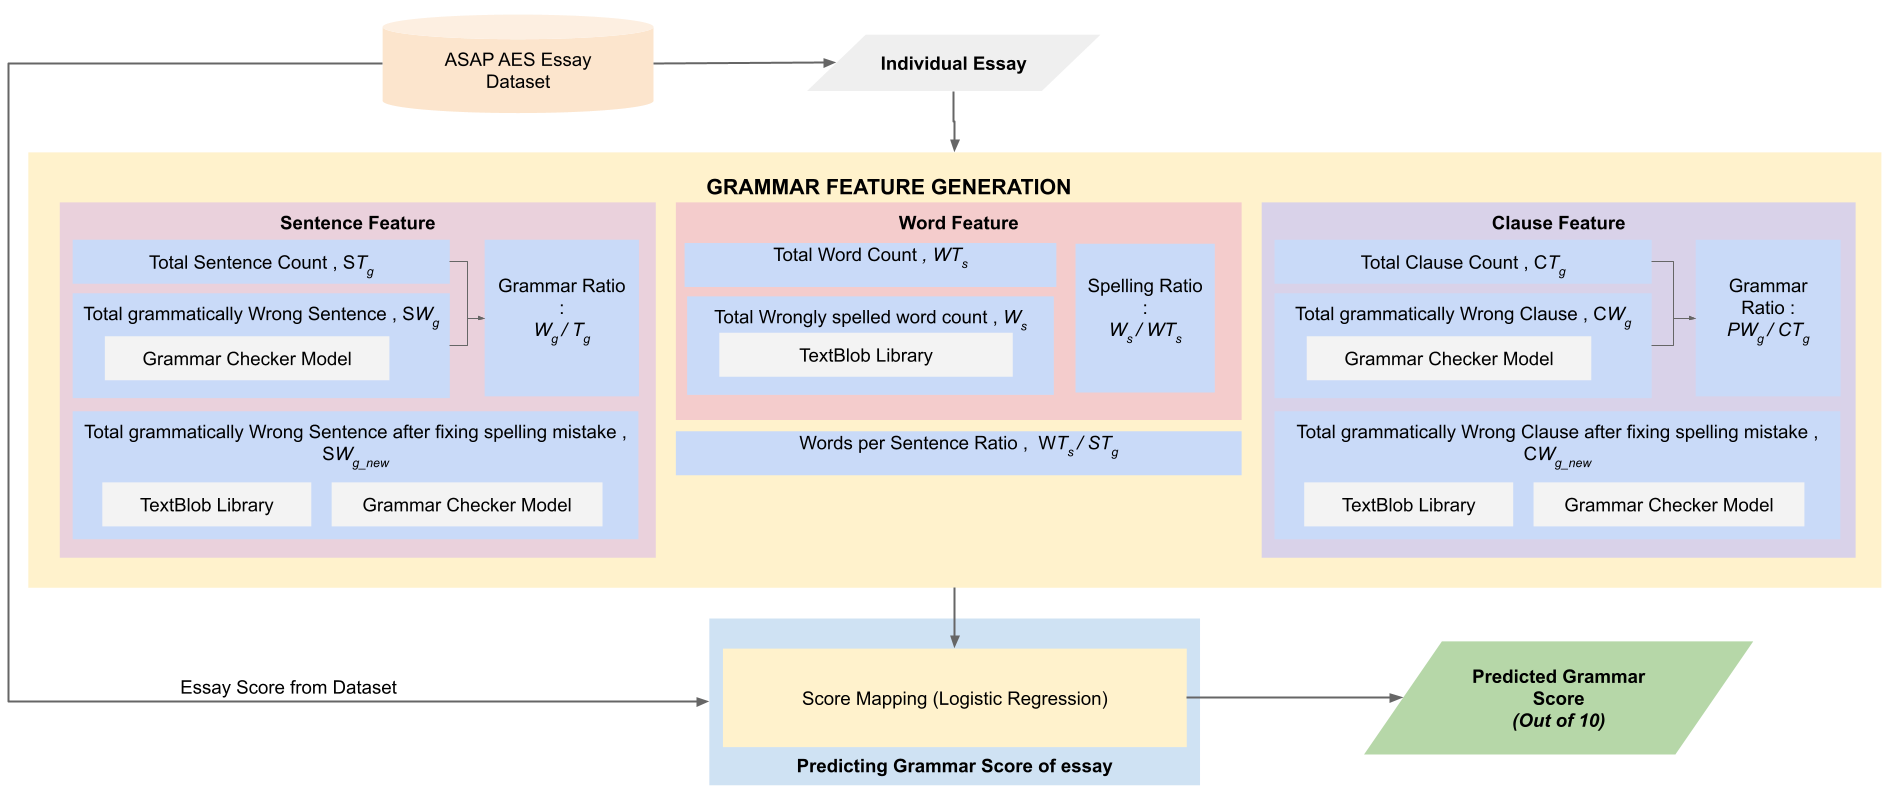

Use generated model to check individual sentence's grammar

In [ ]:
#Initiate saved models
print("Saved Model Path : "+gsm_output_dir)
tokenizer = BertTokenizer.from_pretrained(gsm_output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(gsm_output_dir)

#Function to check individual sentence if grammatically correct or not.
def check_grammar(s,tokenizer = tokenizer , model_loaded = model_loaded):
  
  result = 0
  sent = s
  encoded_dict = tokenizer.encode_plus(
                          sent,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 64,           # Pad & truncate all sentences.
                          #pad_to_max_length = True,
                          padding = 'max_length',
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
      
      # Add the encoded sentence to the list.    
  input_id = encoded_dict['input_ids']
      
      # And its attention mask (simply differentiates padding from non-padding).
  attention_mask = encoded_dict['attention_mask']
  input_id = torch.LongTensor(input_id)
  attention_mask = torch.LongTensor(attention_mask)

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model_loaded = model_loaded.to(device)
  input_id = input_id.to(device)
  attention_mask = attention_mask.to(device)

  with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

  logits = outputs[0]
  index = logits.argmax()
  if index == 1:
    #Correct Grammar
    result = 0 
  else:
    #Incorrect Grammar
    result = 1 
  return result

Saved Model Path : /content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Grammar_Score_Model/


New Functions for feature generations using Spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def clean_essay(essay):
  result = re.sub(r' @',' ',essay)
  return result

#Function to seperate sentences
def essay_to_sentences(essay , sentence_list_flag = 1 , sentence_count_flag = 0):
  essay = clean_essay(essay)
  doc = nlp(essay)
  result = []
  for d in doc.sents:
    result.append(str(d))
  if sentence_list_flag == 1:
    return result
  if sentence_count_flag == 1:
    return len(result)

# find the root token of the sentence, which is usually the main verb. In instances where there is a dependent clause, it is the verb of the independent clause
def find_root_of_sentence(doc):
    root_token = None
    for token in doc:
        if (token.dep_ == "ROOT"):
            root_token = token
    return root_token

#Function to find the other verbs in the sentence
def find_other_verbs(doc, root_token):
    other_verbs = []
    for token in doc:
        ancestors = list(token.ancestors)
        if (token.pos_ == "VERB" and len(ancestors) == 1\
            and ancestors[0] == root_token):
            other_verbs.append(token)
    return other_verbs


#Function to find the token spans for each verb
def get_clause_token_span_for_verb(verb, doc, all_verbs):
    first_token_index = len(doc)
    last_token_index = 0
    this_verb_children = list(verb.children)
    for child in this_verb_children:
        if (child not in all_verbs):
            if (child.i < first_token_index):
                first_token_index = child.i
            if (child.i > last_token_index):
                last_token_index = child.i
    return(first_token_index, last_token_index)

#Function to split individual sentences into clauses
def sentence_to_clauses(sentence , clause_list_flag = 1 , clause_count_flag = 0):
  doc = nlp(sentence)
  for token in doc:
      ancestors = [t.text for t in token.ancestors]
      children = [t.text for t in token.children]
      #print(token.text, "\t", token.i, "\t", token.pos_, "\t", token.dep_, "\t", ancestors, "\t", children)
  root_token = find_root_of_sentence(doc)
  other_verbs = find_other_verbs(doc, root_token)

  token_spans = []   
  all_verbs = [root_token] + other_verbs
  for other_verb in all_verbs:
      (first_token_index, last_token_index) = \
      get_clause_token_span_for_verb(other_verb, 
                                      doc, all_verbs)
      token_spans.append((first_token_index, 
                          last_token_index))
      
  sentence_clauses = []
  for token_span in token_spans:
      start = token_span[0]
      end = token_span[1]
      if (start < end):
          clause = doc[start:end]
          sentence_clauses.append(clause)
  sentence_clauses = sorted(sentence_clauses, 
                            key=lambda tup: tup[0])

  result = [clause.text for clause in sentence_clauses]
  if clause_list_flag == 1:
    return result
  if clause_count_flag == 1:
    return len(result)
  
#Function to get clauses list from essay
def essay_to_clauses(essay, clause_list_flag = 1 , clause_count_flag = 0):
  essay = clean_essay(essay)
  result = []
  sentence_list = essay_to_sentences(essay)
  for sent in sentence_list:
    result = result+sentence_to_clauses(sent)
  if clause_list_flag == 1:
    return result
  if clause_count_flag == 1:
    return len(result)

#Function to seperate words
def essay_to_words(essay, word_list_flag = 1 , word_count_flag=0):
  essay = clean_essay(essay)
  doc = nlp(essay)
  result = []
  for word in doc:
    if str(word.text).isalpha():
      result.append(str(word.text))
  if word_list_flag == 1:
    return result
  if word_count_flag == 1:
    return len(result)

#Function to return total grammatically wrong sentences
def grammar_details_sentences(para,p1 = 0):
  sentence_list = essay_to_sentences(para,1,0)
  grammar_error_count = 0
  for s in sentence_list:
    error_status = check_grammar(s)
    if error_status == 1 and p1 == 1:
      print(s)
    grammar_error_count += error_status
  return grammar_error_count

#Function to return total grammatically wrong clauses
def grammar_details_clauses( essay,p1 = 0 ):
  clause_list = essay_to_clauses(essay)
  grammar_error_count = 0
  for s in clause_list:
    error_status = check_grammar(s)
    if error_status == 1 and p1 == 1:
      print(s)
    grammar_error_count += error_status
  return grammar_error_count

#Get wrong spelling word count
from textblob import TextBlob

#Function to get count of spelling mistakes
def spelling_mistake_count(para):
  results = 0
  tok = essay_to_words(para,1,0)
  for t in tok:
    if t != TextBlob(t).correct():
      results = results + 1
  return results

import jamspell
jsp = jamspell.TSpellCorrector()
assert jsp.LoadLangModel('/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/Language Models/en.bin')

#Attempting to Fix Spelling Mistake
def fix_spelling_in_essay(essay, option = 1):
  
  #Method 3
  corrected_para = ""
  if option == 1:
    s_list = essay_to_sentences(essay,1,0)
  if option == 2:
    s_list = para_to_sent_using_re(essay)
  for s in s_list:
    corrected_para = corrected_para + jsp.FixFragment(s)

  return corrected_para

#More feature generation
def words_per_sentence(para):
  return essay_to_words(para,0,1)/essay_to_sentences(para,0,1)

def words_per_clause(para):
  return essay_to_words(para,0,1)/essay_to_clauses(para,0,1)

In [ ]:
data_set

,essay_id,essay_set,essay,structure_score,grammar_score
0,17834,7,Patience is when your waiting .I was patience ...,5,8
1,17836,7,"I am not a patience person, like I can’t sit i...",5,5
2,17837,7,One day I was at basketball practice and I was...,6,6
3,17838,7,I going to write about a time when I went to t...,6,8
4,17839,7,It can be very hard for somebody to be patient...,5,6
...,...,...,...,...,...
995,18936,7,"One time when I was patient, I got rewarded. J...",6,6
996,18937,7,My mom and I were were on are way to are house...,4,3
997,18938,7,One time I got birthday money I wanted to buy ...,6,8
998,18939,7,"Patience is, in definition, being understandin...",3,6


In [ ]:
#Sentence Level Analysis
#import re

#Clean essay by removing '@'
def clean_essay(essay):
  result = re.sub(r' @',' ',essay)
  return result

#Function to return Total Sentence count using regular expression
def sentence_count(para):
  total_sentence = len(para_to_sent_using_re(para))
  return total_sentence

#Split essay into sentence using "."
def basic_para_to_sent(essay):
  return essay.split(".")

#Function to split sentences using regular expression
def para_to_sent_using_re(essay):
  m = re.split(r'([\s][.?!]+)|([.?!]+[\s])', essay)
  m = [str(i) for i in m if i!=None ]
  p1 = m[0::2]
  p2 = m[1::2]
  if len(p1) != len(p2):
    mins = min(len(p1) , len(p2))
    maxs = max(len(p1) , len(p2))
    diff = maxs-mins
    if len(p1)>len(p2):
      p2 = p2 + [" "*diff]
    else:
      p1 = p1 + [" "*diff]
  m = [a+b for a,b in zip(p1,p2)]
  return m

#Function to return total grammatically wrong sentences from total sentences
def grammar_details(para,p1 = 0):
  sentence_list = para_to_sent_using_re(para)
  grammar_error_count = 0
  for s in sentence_list:
    error_status = check_grammar(s)
    if error_status == 1 and p1 == 1:
      print(s)
    grammar_error_count += error_status
  return grammar_error_count

In [ ]:
#total essays to work with, due to RAM/Time constraint

#Generating sentence features=====================================================================================================================
print_banner("GENERATING  SENTENCE FEATURES")

#Total Sentence count, per essay
print("Total Sentence count, per essay...")
#data_set['total sentences'] = data_set['essay'].apply(lambda x : int(essay_to_sentences(str(x),0,1)))
data_set['total sentences'] = data_set['essay'].apply(lambda x : int(sentence_count(str(x))))

#Total grammatically wrong sentences, per essay
print("Total grammatically wrong sentences, per essay...")
#data_set['total grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details_sentences(str(x))))
data_set['total grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details(str(x))))

#Ratio of grammatically wrong sentences to total sentences, per essay
print("Ratio of grammatically wrong sentences to total sentences, per essay...")
data_set['grammar ratio'] = data_set['total grammar errors']/data_set['total sentences']

#Totall Grammatically Wrong Sentence after fixing spelling mistakes
print("Totall Grammatically Wrong Sentence after fixing spelling mistakes, per essay...")
#data_set['total grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details_sentences(fix_spelling_in_essay(x))))
data_set['total grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details(fix_spelling_in_essay(x,2))))

#Generating Clause features=====================================================================================================================
print_banner("GENERATING CLAUSE FEATURES")

#Total Clause count, per essay
print("Total Clause, per essay...")
data_set['total clauses'] = data_set['essay'].apply(lambda x : int(essay_to_clauses(str(x),0,1)))

#Total grammatically wrong phrases, per essay
print("Total grammatically wrong clauses, per essay...")
data_set['total clause grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details_clauses(str(x))))

#Totall Grammatically Wrong Clauses after fixing spelling mistakes
print("Totall Grammatically Wrong Clauses after fixing spelling mistakes, per essay...")
data_set['total clause grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details_clauses(fix_spelling_in_essay(x))))
#data_set['total clause grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details(fix_spelling_in_essay(x,1))))

#Ratio of grammatically wrong phrases to total phrases, per essay
print("Ratio of grammatically wrong clauses to total clauses, per essay...")
data_set['clause grammar_ratio'] = data_set['total clause grammar errors']/data_set['total clauses']

#Generating Word features=====================================================================================================================
print_banner("GENERATING WORD FEATURES")

#Total word count, per essay
print("Total word count, per essay...")
data_set["total word count"] = data_set['essay'].apply(lambda x : essay_to_words(x,0,1))

#Total wrongly spelled word count, per essay
print("Total wrongly spelled word count, per essay...")
data_set["wrong word count"] = data_set['essay'].apply(lambda x : spelling_mistake_count(x))

#Ratio of wrongly spelled word to total word count , per essay
print("Ratio of wrongly spelled word to total word count, per essay...")
data_set['spelling ratio'] = data_set["wrong word count"]/data_set["total word count"]

#Generating Extra features=====================================================================================================================
print_banner("GENERATING EXTRA FEATURES")

#Ratio of words per sentence
print("Ratio of words per sentence, per essay...")
data_set['words per sentence'] = data_set['essay'].apply(lambda x : int(words_per_sentence(str(x))))

#Ratio of words per clasue
print("Ratio of words per clause, per essay...")
data_set['words per clause'] = data_set['essay'].apply(lambda x : int(words_per_clause(str(x))))

GENERATING  SENTENCE FEATURES
Total Sentence count, per essay...
Total grammatically wrong sentences, per essay...
Ratio of grammatically wrong sentences to total sentences, per essay...
Totall Grammatically Wrong Sentence after fixing spelling mistakes, per essay...
GENERATING CLAUSE FEATURES
Total Clause, per essay...
Total grammatically wrong clauses, per essay...
Totall Grammatically Wrong Clauses after fixing spelling mistakes, per essay...
Ratio of grammatically wrong clauses to total clauses, per essay...
GENERATING WORD FEATURES
Total word count, per essay...
Total wrongly spelled word count, per essay...
Ratio of wrongly spelled word to total word count, per essay...
GENERATING EXTRA FEATURES
Ratio of words per sentence, per essay...
Ratio of words per clause, per essay...


In [ ]:
#Show data set
data_set.head()

,essay_id,essay_set,essay,structure_score,grammar_score,total sentences,total grammar errors,grammar ratio,total grammar errors after spelling fix,total clauses,total clause grammar errors,total clause grammar errors after spelling fix,clause grammar_ratio,total word count,wrong word count,spelling ratio,words per sentence,words per clause
0,17834,7,Patience is when your waiting .I was patience ...,5,8,11,3,0.272727,3,9,3,2,0.333333,82,0,0.000000,27,9
1,17836,7,"I am not a patience person, like I can’t sit i...",5,5,3,3,1.000000,3,11,7,6,0.636364,92,7,0.076087,18,8
2,17837,7,One day I was at basketball practice and I was...,6,6,2,2,1.000000,2,12,6,7,0.500000,148,7,0.047297,18,12
3,17838,7,I going to write about a time when I went to t...,6,8,13,4,0.307692,3,21,5,4,0.238095,214,8,0.037383,15,10
4,17839,7,It can be very hard for somebody to be patient...,5,6,12,0,0.000000,0,17,2,2,0.117647,149,5,0.033557,12,8


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   essay_id                                        1000 non-null   int64  
 1   essay_set                                       1000 non-null   int64  
 2   essay                                           1000 non-null   object 
 3   structure_score                                 1000 non-null   int64  
 4   grammar_score                                   1000 non-null   int64  
 5   total sentences                                 1000 non-null   int64  
 6   total grammar errors                            1000 non-null   int64  
 7   grammar ratio                                   1000 non-null   float64
 8   total grammar errors after spelling fix         1000 non-null   int64  
 9   total clauses                             

In [ ]:
#save grammar feature data frame of train test set to work with later, in csv format
#data_set.to_csv(data_set_path='/ASAP_AES/grammar_details_train test set_feature generation_v8.csv')

#### ***Training & Testing***

Grammar Score Prediction using Logistic Regression

In [ ]:
## Define X and Y variables
X = data_set.iloc[:,[3,5,6,7,8,9,10,11,12]]
Y = data_set[['grammar_score']]

##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

#Assign value to global dataframe for final testing
gs_test_x = X_test
gs_test_y = y_test

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

#Inititate Logistic Regression Model
grammar_score_predict_logreg = LogisticRegression(random_state=42);

#Train the model
grammar_score_predict_logreg.fit(X_train, y_train)

#Test the model
y_predict = grammar_score_predict_logreg.predict(X_train)
y_predict_prob = grammar_score_predict_logreg.predict_proba(X_train)
confusion_matrix(y_train,y_predict)
print(y_predict)

[10  6  8  8  6  6  6  6  8  6  6  8  8 10 10  6  8  6  6  6  6  6  6  6
  6  6  8 10  8 10  6  6 10  3 10  6  3  8  8  8  6  8  6  6  6  8  6  6
 10 10  6  6 10  6  3  6 10  6  3  6  8 10  8  6  8  3 10  3  6 10 10  5
  6  6  5  8  6  5  3  8 10  6 10  6  6  6  8 10  6  6  8  6 10 10 10 10
  6 10  5 10  6  8  3  8  6  5  8  8  6 10  6  6  6 10 10  8  6  6  6  6
 10 10  6  6  6  3  3  6  6  3  6  6  6  3 10 10 10  6 10  6 10  6  6  6
  6  6  6  8 10  8  6  6  6  8  6  6  8  3  3  8  6 10  8  5 10  6  6  5
  6 10  6  6 10  6  6  6  6 10  3  6  3 10  6 10  6  8  6  6  6 10  5  6
  3  6  8 10  6 10  6  6  6  6  6 10  6 10  6  6  8  8  6  3  8 10  6  6
  3  6  3  5  8  8  6  6 10  6  8  6  6  3  6  6  6 10 10  6  8 10  8  6
  8  8  6  8  6  6  6  6 10 10 10 10  8  6  8  6  8  3  6  6 10  6 10  6
  8 10  8  6  6  6  3  8 10 10  6  6  6  8  6  3 10  6  8  3 10  6  6  8
  8  8  6  3  6 10  8  8 10 10 10 10  6 10  3  3  6  5  6  8  6  6 10  6
  3  8  6  8  6  8  6 10  6  6  6 10  6  3  8  6 10

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#To check if null values are present
X.isnull().any()

structure_score                                   False
total sentences                                   False
total grammar errors                              False
grammar ratio                                     False
total grammar errors after spelling fix           False
total clauses                                     False
total clause grammar errors                       False
total clause grammar errors after spelling fix    False
clause grammar_ratio                              False
dtype: bool

#### ***Evaluation Score***

In [ ]:
#QWK Score on unknown Test set
p1 = grammar_score_predict_logreg.predict(X_test)
print(len(p1))
p2 = pd.DataFrame(y_test , columns = ['grammar_score']).squeeze().to_list()
print(len(p2))
print(cohen_kappa_score(p1,p2,weights='quadratic'))

300
300
0.6874227823078825


In [ ]:
p1 = grammar_score_predict_logreg.predict(X)
print(len(p1))
p2 = pd.DataFrame(data_set , columns = ['grammar_score']).squeeze().to_list()
print(len(p2))
print(cohen_kappa_score(p1,p2,weights='quadratic'))

1000
1000
0.7070324088907876


#### ***Save the Model***

In [ ]:
print("Version Number : ",version)

Version Number :  _vF


In [ ]:
gsm_output_dir+gsm_reg_model_name+".sav"

'/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Grammar_Score_Model/gsm_reg_model_vF.sav'

In [ ]:
# grammar_logreg_save_option = 1
if grammar_logreg_save_option == 1:
  # Save a trained model
  logRegModel_save_path = gsm_output_dir+gsm_reg_model_name+".sav"
  pickle.dump(grammar_score_predict_logreg, open(logRegModel_save_path, 'wb')) 
  print("Saving model to %s" % logRegModel_save_path)

if grammar_logreg_save_option == 0:
  print("GRAMMAR LogReg Model save option not selected.")

GRAMMAR LogReg Model save option not selected.


### ***Functions of Grammar Score Module***

In [ ]:
#Import for Grammar
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch
import nltk
nltk.download('punkt')

#Import libraries
import pandas as pd

from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Load Saved Regression Model

In [ ]:
#Load Saved Logistic Regression Model
model = gsm_output_dir+gsm_reg_model_name+".sav"
grammar_score_logreg_model = pickle.load(open(model, 'rb'))
if grammar_score_logreg_model:
  print("Succesfully Loaded : ",model," !")
else:
  print("Model Load Failed!")

Succesfully Loaded :  /content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Grammar_Score_Model/gsm_reg_model_vF.sav  !


Important Funnctions for Grammar feature generation and scoring

In [ ]:
#Initiate saved models
print("Saved Model Path : "+gsm_output_dir)
tokenizer = BertTokenizer.from_pretrained(gsm_output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(gsm_output_dir)

#Function to check individual sentence if grammatically correct or not using our GCM.
def check_grammar(s,tokenizer = tokenizer , model_loaded = model_loaded):
  
  result = 0
  sent = s
  encoded_dict = tokenizer.encode_plus(
                          sent,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 64,           # Pad & truncate all sentences.
                          #pad_to_max_length = True,
                          padding = 'max_length',
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
      
      # Add the encoded sentence to the list.    
  input_id = encoded_dict['input_ids']
      
      # And its attention mask (simply differentiates padding from non-padding).
  attention_mask = encoded_dict['attention_mask']
  input_id = torch.LongTensor(input_id)
  attention_mask = torch.LongTensor(attention_mask)

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model_loaded = model_loaded.to(device)
  input_id = input_id.to(device)
  attention_mask = attention_mask.to(device)

  with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

  logits = outputs[0]
  index = logits.argmax()
  if index == 1:
    #Correct Grammar
    result = 0 
  else:
    #Incorrect Grammar
    result = 1 
  return result

Saved Model Path : /content/drive/MyDrive/Colab Notebooks/AES/Saved Models/AES Models/Grammar_Score_Model/


In [ ]:
#Sentence Level Analysis
#import re

#Clean essay by removing '@'
def clean_essay(essay):
  result = re.sub(r' @',' ',essay)
  return result

#Function to return Total Sentence count using regular expression
def sentence_count(para):
  total_sentence = len(para_to_sent_using_re(para))
  return total_sentence

#Split essay into sentence using "."
def basic_para_to_sent(essay):
  return essay.split(".")

#Function to split sentences using regular expression
def para_to_sent_using_re(essay):
  m = re.split(r'([\s][.?!]+)|([.?!]+[\s])', essay)
  m = [str(i) for i in m if i!=None ]
  p1 = m[0::2]
  p2 = m[1::2]
  if len(p1) != len(p2):
    mins = min(len(p1) , len(p2))
    maxs = max(len(p1) , len(p2))
    diff = maxs-mins
    if len(p1)>len(p2):
      p2 = p2 + [" "*diff]
    else:
      p1 = p1 + [" "*diff]
  m = [a+b for a,b in zip(p1,p2)]
  return m

#Function to return total grammatically wrong sentences from total sentences
def grammar_details(para,p1 = 0):
  sentence_list = para_to_sent_using_re(para)
  grammar_error_count = 0
  for s in sentence_list:
    error_status = check_grammar(s)
    if error_status == 1 and p1 == 1:
      print(s)
    grammar_error_count += error_status
  return grammar_error_count

New Funtions

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

#Remove special Symbols from essay
def clean_essay(essay):
  result = re.sub(r' @',' ',essay)
  return result

#Function to seperate sentences
def essay_to_sentences(essay , sentence_list_flag = 1 , sentence_count_flag = 0):
  essay = clean_essay(essay)
  doc = nlp(essay)
  result = []
  for d in doc.sents:
    result.append(str(d))
  if sentence_list_flag == 1:
    return result
  if sentence_count_flag == 1:
    return len(result)

# find the root token of the sentence, which is usually the main verb. In instances where there is a dependent clause, it is the verb of the independent clause
def find_root_of_sentence(doc):
    root_token = None
    for token in doc:
        if (token.dep_ == "ROOT"):
            root_token = token
    return root_token

#Function to find the other verbs in the sentence
def find_other_verbs(doc, root_token):
    other_verbs = []
    for token in doc:
        ancestors = list(token.ancestors)
        if (token.pos_ == "VERB" and len(ancestors) == 1\
            and ancestors[0] == root_token):
            other_verbs.append(token)
    return other_verbs


#Function to find the token spans for each verb
def get_clause_token_span_for_verb(verb, doc, all_verbs):
    first_token_index = len(doc)
    last_token_index = 0
    this_verb_children = list(verb.children)
    for child in this_verb_children:
        if (child not in all_verbs):
            if (child.i < first_token_index):
                first_token_index = child.i
            if (child.i > last_token_index):
                last_token_index = child.i
    return(first_token_index, last_token_index)

#Function to split individual sentences into clauses
def sentence_to_clauses(sentence , clause_list_flag = 1 , clause_count_flag = 0):
  doc = nlp(sentence)
  for token in doc:
      ancestors = [t.text for t in token.ancestors]
      children = [t.text for t in token.children]
      #print(token.text, "\t", token.i, "\t", token.pos_, "\t", token.dep_, "\t", ancestors, "\t", children)
  root_token = find_root_of_sentence(doc)
  other_verbs = find_other_verbs(doc, root_token)

  token_spans = []   
  all_verbs = [root_token] + other_verbs
  for other_verb in all_verbs:
      (first_token_index, last_token_index) = \
      get_clause_token_span_for_verb(other_verb, 
                                      doc, all_verbs)
      token_spans.append((first_token_index, 
                          last_token_index))
      
  sentence_clauses = []
  for token_span in token_spans:
      start = token_span[0]
      end = token_span[1]
      if (start < end):
          clause = doc[start:end]
          sentence_clauses.append(clause)
  sentence_clauses = sorted(sentence_clauses, 
                            key=lambda tup: tup[0])

  result = [clause.text for clause in sentence_clauses]
  if clause_list_flag == 1:
    return result
  if clause_count_flag == 1:
    return len(result)
  
#Function to get clauses list from essay
def essay_to_clauses(essay, clause_list_flag = 1 , clause_count_flag = 0):
  essay = clean_essay(essay)
  result = []
  sentence_list = essay_to_sentences(essay)
  for sent in sentence_list:
    result = result+sentence_to_clauses(sent)
  if clause_list_flag == 1:
    return result
  if clause_count_flag == 1:
    return len(result)

#Function to seperate words
def essay_to_words(essay, word_list_flag = 1 , word_count_flag=0):
  essay = clean_essay(essay)
  doc = nlp(essay)
  result = []
  for word in doc:
    if str(word.text).isalpha():
      result.append(str(word.text))
  if word_list_flag == 1:
    return result
  if word_count_flag == 1:
    return len(result)

#Function to return total grammatically wrong sentences
def grammar_details_sentences(para,p1 = 0):
  sentence_list = essay_to_sentences(para,1,0)
  grammar_error_count = 0
  for s in sentence_list:
    error_status = check_grammar(s)
    if error_status == 1 and p1 == 1:
      print(s)
    grammar_error_count += error_status
  return grammar_error_count

#Function to return total grammatically wrong clauses
def grammar_details_clauses( essay,p1 = 0 ):
  clause_list = essay_to_clauses(essay)
  grammar_error_count = 0
  for s in clause_list:
    error_status = check_grammar(s)
    if error_status == 1 and p1 == 1:
      print(s)
    grammar_error_count += error_status
  return grammar_error_count

#Get wrong spelling word count
from textblob import TextBlob

#Function to get count of spelling mistakes
def spelling_mistake_count(para):
  results = 0
  tok = essay_to_words(para,1,0)
  for t in tok:
    if t != TextBlob(t).correct():
      results = results + 1
  return results

import jamspell
jsp = jamspell.TSpellCorrector()
assert jsp.LoadLangModel('/content/drive/MyDrive/Colab Notebooks/AES/Saved Models/Language Models/en.bin')

#Attempting to Fix Spelling Mistake
def fix_spelling_in_essay(essay, option = 1):
  
  #Method 3
  corrected_para = ""
  if option == 1:
    s_list = essay_to_sentences(essay,1,0)
  if option == 2:
    s_list = para_to_sent_using_re(essay)
  for s in s_list:
    corrected_para = corrected_para + jsp.FixFragment(s)

  return corrected_para

#More feature generation
def words_per_sentence(para):
  return essay_to_words(para,0,1)/essay_to_sentences(para,0,1)

def words_per_clause(para):
  return essay_to_words(para,0,1)/essay_to_clauses(para,0,1)

In [ ]:
#Funtion to generate features from essays
def generate_grammar_score_features(essay,print_index = 0):

  data_set = pd.DataFrame([{'essay':essay}])
  
  #Predict Structure Score
  data_set['structure_score'] = data_set['essay'].apply(lambda x : int(demo_essay_structure_score(str(x))))
  
  #Generating sentence features

  #Total Sentence count, per essay
  data_set['total sentences'] = data_set['essay'].apply(lambda x : int(sentence_count(str(x))))

  #Total grammatically wrong sentences, per essay
  #data_set['Total Grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details(str(x))))
  data_set['total grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details(str(x))))

  #Ratio of grammatically wrong sentences to total sentences, per essay
  data_set['grammar ratio'] = data_set['total grammar errors']/data_set['total sentences']

  #Totall Grammatically Wrong Sentence after fixing spelling mistakes
  data_set['total grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details(fix_spelling_in_essay(x,2))))

  #Generating Clause features
  
  #Total Clause count, per essay
  data_set['total clauses'] = data_set['essay'].apply(lambda x : int(essay_to_clauses(str(x),0,1)))

  #Total grammatically wrong phrases, per essay
  data_set['total clause grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details_clauses(str(x))))

  #Totall Grammatically Wrong Clauses after fixing spelling mistakes
  data_set['total clause grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details_clauses(fix_spelling_in_essay(x))))

  #Ratio of grammatically wrong phrases to total phrases, per essay
  data_set['clause grammar_ratio'] = data_set['total clause grammar errors']/data_set['total clauses']

  #Generating Word features

  #Total word count, per essay
  data_set["total word count"] = data_set['essay'].apply(lambda x : essay_to_words(x,0,1))

  #Total wrongly spelled word count, per essay
  data_set["wrong word count"] = data_set['essay'].apply(lambda x : spelling_mistake_count(x))

  #Ratio of wrongly spelled word to total word count , per essay
  data_set['spelling ratio'] = data_set["wrong word count"]/data_set["total word count"]

  #Ratio of words per sentence
  data_set['words per sentence'] = data_set['essay'].apply(lambda x : int(words_per_sentence(str(x))))

  #Ratio of words per clasue
  data_set['words per clause'] = data_set['essay'].apply(lambda x : int(words_per_clause(str(x))))

  if print_index == 1:
    print("gs:",data_set.index)
  return data_set

In [ ]:
essay = """Patience is when your waiting .I was patience when in line waiting for lunch .I didn’t c ut any one to eat .I was standing and waiting for my turn .Patience ,some people don’t have it .Lots of people just cut or yell at you because they don’t have any patience. Sometimes people will push you out of their way .They only do that because they don’t have patience at all. Patience is what people need .People need patience because lots o f feelings get hurt .Everyone should have patience."""
print("ESSAY :\n"+essay)

ESSAY :
Patience is when your waiting .I was patience when in line waiting for lunch .I didn’t c ut any one to eat .I was standing and waiting for my turn .Patience ,some people don’t have it .Lots of people just cut or yell at you because they don’t have any patience. Sometimes people will push you out of their way .They only do that because they don’t have patience at all. Patience is what people need .People need patience because lots o f feelings get hurt .Everyone should have patience.


In [ ]:
generate_grammar_score_features(essay).info()

1/1 [==============================] - 0s 22ms/step
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   essay                                           1 non-null      object 
 1   structure_score                                 1 non-null      int64  
 2   total sentences                                 1 non-null      int64  
 3   total grammar errors                            1 non-null      int64  
 4   grammar ratio                                   1 non-null      float64
 5   total grammar errors after spelling fix         1 non-null      int64  
 6   total clauses                                   1 non-null      int64  
 7   total clause grammar errors                     1 non-null      int64  
 8   total clause grammar errors after spelling fix  1 non-null      int64  


In [ ]:
#Final Function to return grammar score for essay
def essay_grammar_score(essay, print_index = 0):
  record = generate_grammar_score_features(essay).iloc[:,[1,2,3,4,5,6,7,8,9]]
  score = score_range(grammar_score_logreg_model.predict(record)[0])
  if print_index == 1:
    print("gs:",data_set.index)
  return score

In [ ]:
essay = """I going to write about a time when I went to the @ORGANIZATION1 fair, we had fun, we saw a ride we wanted to get on, so we got in line. Suddenly, we noticed that we were at the end of the line. So my mother said." @CAPS1 get on another ride then". We already tried the other rides," my father said. So we stayed at the end of the line until it was our turn, and said that was the last ride, soon there were people behind us complaining, their younger children was getting mad, and parents was hollering. We just stood there, and kept being patient. That didn't desterb us. since we were raised to be patient, and wait our turn at things. I feel being patient is very important, because if you act up in line, you might make people think they're holding you up, but it's the line moving slow. Advice: when you are waiting at the end of the line, don't shout, scream, holler, or yell at anyone, it only creates trouble. Just don't think about all of the people ahead of you, talk to someone, just take your mind off of it for a while, then you'll notice, the line is moving quicker than you expected. P.S. We enjoyed the ride.
"""
print("GRAMMAR ANALYSIS\n")

print("Grammar Score is : "+ str(essay_grammar_score(clean_essay(essay))))

GRAMMAR ANALYSIS

1/1 [==============================] - 0s 18ms/step
Grammar Score is : 8


In [ ]:
#print(grammar_score_logreg_model.predict(record.drop(['essay'],axis=1))[0])

# **Show Result**

In [ ]:
#For testing Purpose
analysis_set = pd.read_csv(data_set_path+'/ASAP_AES/asap_aes_set_7_analysis_dataset.csv')
analysis_set = analysis_set.head(568)
analysis_set

,essay_id,essay_set,essay,structure_score,grammar_score
0,18942,7,One time when I had a lot of paitenits is when...,7,10
1,18943,7,It was cold fall afternoon. Meant my grandpa w...,10,10
2,18944,7,One time I was patient. I don’t want a birthda...,5,5
3,18945,7,“Patience is a virtue.” I hear that saying ove...,10,10
4,18946,7,I wondered who would win. I just hoped I would...,10,10
...,...,...,...,...,...
563,19558,7,One time I was getting a cool @CAPS1 game it w...,5,3
564,19559,7,A patent person in my life is my mom. Aicason ...,5,10
565,19561,7,A time when someone else I know was patient wa...,7,8
566,19562,7,I hate weddings. I love when people get marrie...,8,10


In [ ]:
# analysis_set = analysis_set.head(50)
# analysis_set

In [ ]:
print_banner("WORKING ON ANALYSIS SET")

#Remove @ from essay's words.
print("Cleaning Data...")
analysis_set['essay'] = analysis_set['essay'].apply(lambda x : clean_essay(str(x)))
print_dashline()

#Predict Structure Score for each essay
print("Predicting Structure Score...")
analysis_set['predicted_structure_score'] = analysis_set['essay'].apply(lambda x : int(demo_essay_structure_score(str(x))))
print_dashline()

#Predict Grammar Score for each essay
print("Predicting Grammar Score...")
analysis_set['predicted_grammar_score'] = analysis_set['essay'].apply(lambda x : int(essay_grammar_score(str(x))))
print_dashline()

In [ ]:
# analysis_set.info()

In [ ]:
#Rearrange scores
analysis_set = analysis_set.loc[:, ["essay_id","essay_set","essay","structure_score","predicted_structure_score","grammar_score","predicted_grammar_score"]]

In [ ]:
#Calculate Golden Total Score
analysis_set["golden_total_score"] = analysis_set["structure_score"]+analysis_set["grammar_score"]
#print(analysis_set["golden_total_score"].isnull().sum())

#Calculate Prdeicted Total Score
analysis_set["predicted_total_score"] = analysis_set["predicted_structure_score"]+analysis_set["predicted_grammar_score"]

#Calculate Score difference
analysis_set["ss_diff"] = abs(analysis_set["structure_score"]-analysis_set["predicted_structure_score"])
analysis_set["gs_diff"] = abs(analysis_set["grammar_score"]-analysis_set["predicted_grammar_score"])
analysis_set["ts_diff"] = abs(analysis_set["golden_total_score"]-analysis_set["predicted_total_score"])

analysis_set

##Important Functions for Analysis

In [ ]:
#Function to line plot
def line_plot_figure(p1 , p2 , p1_name , p2_name ,linewidth=4):
  t = p1_name+" Vs "+p2_name

  sns.set(rc = {'figure.figsize':(50,8),'axes.facecolor':'white'})
  ax = sns.lineplot(data=p1,color="orange",linewidth = linewidth)
  ax = sns.lineplot(data=p2,color="blue",linewidth = linewidth)
  #ax.set(xlim=(0,300),ylim=(0,20))

  # plt.legend(title = t,labels=[p1_name , p2_name], title_fontsize='30')
  #plt.rcParams['figure.figsize']=()
  print(t)
  plt.show()

#Function to BarGraph Graph
def bar_graph_figure(p1 , p1_name):
  print(p1_name)
  
  sns.set(rc = {'figure.figsize':(10,7),'axes.facecolor':'white'})
  ax = sns.histplot(p1 , legend=True , binwidth=1)
  # ax = sns.countplot(p1 , legend=True ,dodge=False)
  ax.set_xlim(0, 10)
  
  for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
  plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
  plt.legend(title = p1_name)
  plt.show()

##Analysis

Select Analysis Set Visualisation Size

In [ ]:
import pandas as pd
#To quick load analysis_set data's result with predicted grammar and structure score
# analysis_set.to_csv(data_set_path+'/ASAP_AES/asap_aes_scored_analysis_dataset'+version+'.csv')
analysis_set = pd.read_csv(data_set_path+'/ASAP_AES/asap_aes_scored_analysis_dataset'+version+'.csv')

In [ ]:
no_of_analysis_essay = 568
analysis_set_part = analysis_set.head(no_of_analysis_essay)

###Structure Score Module

QWK Score for STRUCTURE SCORE MODULE

In [ ]:
#QWK Score for STRUCTURE SCORE MODULE

p1 = pd.DataFrame(analysis_set_part , columns = ["structure_score"]).squeeze().to_list()
#print(len(p1))
p2 = pd.DataFrame(analysis_set_part , columns = ["predicted_structure_score"]).squeeze().to_list()
#print(len(p2))
print("QWK Score for STRUCTURE SCORE MODULE : ",cohen_kappa_score(p1,p2,weights='quadratic'))

Structure_score Vs Predicted_structure_score grpah

In [ ]:
#structure_score Vs predicted_structure_score

p1 = analysis_set_part["structure_score"]
p2 = analysis_set_part["predicted_structure_score"]
p1_name = "structure_score"
p2_name = "predicted_structure_score"

line_plot_figure(p1,p2,p1_name,p2_name)

Total and Golden Score difference frequency for structure score

In [ ]:
#Plot Total and Golden Score difference frequency for structure score

bar_graph_figure(analysis_set_part.ss_diff,"Structure score difference frequency")

###Grammar Score Module

QWK Score for GRAMMAR SCORE MODULE

In [ ]:
#QWK Score for GRAMMAR SCORE MODULE

p1 = pd.DataFrame(analysis_set_part , columns = ["grammar_score"]).squeeze().to_list()
#print(len(p1))
p2 = pd.DataFrame(analysis_set_part , columns = ["predicted_grammar_score"]).squeeze().to_list()
#print(len(p2))
print("QWK Score for GRAMMAR SCORE MODULE : ",cohen_kappa_score(p1,p2,weights='quadratic'))

Grammar_score Vs Predicted_grammar_score graph

In [ ]:
#grammar_score Vs predicted_grammar_score

p1 = analysis_set_part["grammar_score"]
p2 = analysis_set_part["predicted_grammar_score"]
p1_name = "grammar_score"
p2_name = "predicted_grammar_score"

line_plot_figure(p1,p2,p1_name,p2_name)

Total and Golden Score difference frequency for grammar score

In [ ]:
#Plot Total and Golden Score difference frequency for structure score

bar_graph_figure(analysis_set_part.gs_diff , "Grammar Score Difference Frequency")

###Complete AES

QWK Score for complete AES Model

In [ ]:
#QWK Score for COMPLETE AES Model
p1 = pd.DataFrame(analysis_set_part , columns = ["golden_total_score"]).squeeze().to_list()
p2 = pd.DataFrame(analysis_set_part , columns = ["predicted_total_score"]).squeeze().to_list()

print("QWK Score of COMPLETE AES Model : ",cohen_kappa_score(p1,p2,weights='quadratic'))

Golden_total_score Vs Predicted_total_score graph

In [ ]:
#golden_total_score Vs predicted_total_score

p1 = analysis_set_part["golden_total_score"]
p2 = analysis_set_part["predicted_total_score"]
p1_name = "golden_total_score"
p2_name = "predicted_total_score"

line_plot_figure(p1,p2,p1_name,p2_name)

Total and Golden Score difference frequency for Complete AES

In [ ]:
#Total Score Difference Frequency Distribution

bar_graph_figure(analysis_set_part.ts_diff,"Total Score Difference Frequency Distribution")

###Individual Feature vs Score

In [ ]:
generate_new_feature_df = 0

In [ ]:
if generate_new_feature_df == 1 :
  data_set = pd.read_csv(data_set_path+'/ASAP_AES/asap_aes_set_7_analysis_dataset.csv')
  data_set = data_set.head(568)

In [ ]:
if generate_new_feature_df == 1 :
  #total essays to work with, due to RAM/Time constraint

  #Generating sentence features=====================================================================================================================
  print_banner("GENERATING  SENTENCE FEATURES")

  #Total Sentence count, per essay
  print("Total Sentence count, per essay...")
  data_set['total sentences'] = data_set['essay'].apply(lambda x : int(sentence_count(str(x))))

  #Total grammatically wrong sentences, per essay
  print("Total grammatically wrong sentences, per essay...")
  data_set['total grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details(str(x))))

  #Ratio of grammatically wrong sentences to total sentences, per essay
  print("Ratio of grammatically wrong sentences to total sentences, per essay...")
  data_set['grammar ratio'] = data_set['total grammar errors']/data_set['total sentences']

  #Totall Grammatically Wrong Sentence after fixing spelling mistakes
  print("Totall Grammatically Wrong Sentence after fixing spelling mistakes, per essay...")
  data_set['total grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details(fix_spelling_in_essay(x,2))))

In [ ]:
if generate_new_feature_df == 1 :
  
  #Generating Clause features=====================================================================================================================
  print_banner("GENERATING CLAUSE FEATURES")

  #Total Clause count, per essay
  print("Total Clause, per essay...")
  data_set['total clauses'] = data_set['essay'].apply(lambda x : int(essay_to_clauses(str(x),0,1)))

  #Total grammatically wrong phrases, per essay
  print("Total grammatically wrong clauses, per essay...")
  data_set['total clause grammar errors'] = data_set['essay'].apply(lambda x : int(grammar_details_clauses(str(x))))

  #Totall Grammatically Wrong Clauses after fixing spelling mistakes
  print("Totall Grammatically Wrong Clauses after fixing spelling mistakes, per essay...")
  data_set['total clause grammar errors after spelling fix'] = data_set['essay'].apply(lambda x : int(grammar_details_clauses(fix_spelling_in_essay(x))))
  
  #Ratio of grammatically wrong phrases to total phrases, per essay
  print("Ratio of grammatically wrong clauses to total clauses, per essay...")
  data_set['clause grammar_ratio'] = data_set['total clause grammar errors']/data_set['total clauses']

In [ ]:
if generate_new_feature_df == 1 :

  #Generating Word features=====================================================================================================================
  print_banner("GENERATING WORD FEATURES")

  #Total word count, per essay
  print("Total word count, per essay...")
  data_set["total word count"] = data_set['essay'].apply(lambda x : essay_to_words(x,0,1))

  #Total wrongly spelled word count, per essay
  print("Total wrongly spelled word count, per essay...")
  data_set["wrong word count"] = data_set['essay'].apply(lambda x : spelling_mistake_count(x))

  #Ratio of wrongly spelled word to total word count , per essay
  print("Ratio of wrongly spelled word to total word count, per essay...")
  data_set['spelling ratio'] = data_set["wrong word count"]/data_set["total word count"]

  #Generating Extra features=====================================================================================================================
  print_banner("GENERATING EXTRA FEATURES")

  #Ratio of words per sentence
  print("Ratio of words per sentence, per essay...")
  data_set['words per sentence'] = data_set['essay'].apply(lambda x : int(words_per_sentence(str(x))))

  #Ratio of words per clasue
  print("Ratio of words per clause, per essay...")
  data_set['words per clause'] = data_set['essay'].apply(lambda x : int(words_per_clause(str(x))))

In [ ]:
if generate_new_feature_df == 1 :
  #total essays to work with, due to RAM/Time constraint

  #Generating Score=====================================================================================================================
  print_banner("GENERATING SCORES")

  #Remove @ from essay's words.
  print("Cleaning Data...")
  data_set['essay'] = data_set['essay'].apply(lambda x : clean_essay(str(x)))

  #Predict Structure Score for each essay
  print("Predicting Structure Score...")
  data_set['predicted_structure_score'] = data_set['essay'].apply(lambda x : int(demo_essay_structure_score(str(x))))

  #Predict Grammar Score for each essay
  print("Predicting Grammar Score...")
  data_set['predicted_grammar_score'] = data_set['essay'].apply(lambda x : int(essay_grammar_score(str(x))))

  #Calculate Golden Total Score
  print("Golden Total Score...")
  data_set["golden_total_score"] = data_set["structure_score"]+data_set["grammar_score"]
  #print(analysis_set["golden_total_score"].isnull().sum())

  #Calculate Prdeicted Total Score
  print("Predicted Total Score...")
  data_set["predicted_total_score"] = data_set["predicted_structure_score"]+data_set["predicted_grammar_score"]

  data_set.to_csv(data_set_path+'/ASAP_AES/asap_aes_scored_analysis_dataset'+version+'_featureAnalysis.csv')

In [ ]:
if generate_new_feature_df == 1 :
  data_set.to_csv(data_set_path+'/ASAP_AES/asap_aes_scored_analysis_dataset'+version+'_featureAnalysis.csv')

In [ ]:
if generate_new_feature_df == 0 :
  data_set = pd.read_csv(data_set_path+'/ASAP_AES/asap_aes_scored_analysis_dataset'+version+'_featureAnalysis.csv')

In [ ]:
data_set.head(5)

In [ ]:
import math
def feature_score_analysis(feature_name , data_set , score1="golden_total_score" , score2="predicted_total_score" , total_score = 10):
  scores = [i for i in range(total_score+1)]
  #print("Total Score label : " + str(scores))
  avg_golden = []
  for score in scores:
    df = data_set[data_set[score1]==score]
    avg_golden.append(df[feature_name].mean())
  avg_golden = [0 if math.isnan(x) else x for x in avg_golden]

  #print("Average "+feature_name+" per golden score label: " +str(avg_golden))
  avg_predicted = []
  for score in scores:
    df = data_set[data_set[score2]==score]
    avg_predicted.append(df[feature_name].mean())
  avg_predicted = [0 if math.isnan(x) else x for x in avg_predicted]
  #print("Average "+feature_name+" per predicted score label: " +str(avg_predicted))
  
  line_plot_figure(avg_golden , avg_predicted , "[ mean "+feature_name+" vs "+score1+" ]","[ mean "+feature_name+" vs "+score2+" ]")
  #plt.rcParams['figure.figsize']=()
  
  plt.show()
  

####Grammar Score vs Feature Analysis

In [ ]:
# [ mean total sentences vs grammar_score ] Vs [ mean total sentences vs predicted_grammar_score ]

feature_score_analysis("total sentences",data_set,"grammar_score","predicted_grammar_score")

In [ ]:
# [ mean total grammar errors vs grammar_score ] Vs [ mean total grammar errors vs predicted_grammar_score ]

feature_score_analysis("total grammar errors",data_set,"grammar_score","predicted_grammar_score")

In [ ]:
# [ mean total clauses vs grammar_score ] Vs [ mean total clauses vs predicted_grammar_score ]

feature_score_analysis('total clauses',data_set,"grammar_score","predicted_grammar_score")

In [ ]:
# [ mean total clause grammar errors vs grammar_score ] Vs [ mean total clause grammar errors vs predicted_grammar_score ]

feature_score_analysis('total clause grammar errors',data_set,"grammar_score","predicted_grammar_score")

In [ ]:
# [ mean words per sentence vs grammar_score ] Vs [ mean words per sentence vs predicted_grammar_score ]

feature_score_analysis('words per sentence',data_set,"grammar_score","predicted_grammar_score")

In [ ]:
# [ mean words per clause vs grammar_score ] Vs [ mean words per clause vs predicted_grammar_score ]

feature_score_analysis('words per clause',data_set,"grammar_score","predicted_grammar_score")

####Total Score vs Feature Analysis

In [ ]:
# [ mean total sentences vs golden_total_score ] Vs [ mean total sentences vs predicted_total_score ]

feature_score_analysis("total sentences",data_set,total_score=20)

In [ ]:
# [ mean total grammar errors vs golden_total_score ] Vs [ mean total grammar errors vs predicted_total_score ]

feature_score_analysis("total grammar errors",data_set,total_score=20)

In [ ]:
# [ mean total clauses vs golden_total_score ] Vs [ mean total clauses vs predicted_total_score ]

feature_score_analysis('total clauses',data_set,total_score=20)

In [ ]:
# [ mean total clause grammar errors vs golden_total_score ] Vs [ mean total clause grammar errors vs predicted_total_score ]

feature_score_analysis('total clause grammar errors',data_set,total_score=20)

In [ ]:
# [ mean words per sentence vs golden_total_score ] Vs [ mean words per sentence vs predicted_total_score ]

feature_score_analysis('words per sentence',data_set,total_score=20)

In [ ]:
# [ mean words per clause vs golden_total_score ] Vs [ mean words per clause vs predicted_total_score ]
feature_score_analysis('words per clause',data_set,total_score=20)

###Check Individual Essay

####Grammatically Correct Sentence from Wikipedia.

In [ ]:
essay = """The Chicago Bulls are an American professional basketball team based in Chicago. 
The Bulls compete in the National Basketball Association (NBA) as a member of the league's Eastern Conference Central Division. 
The team was founded on January 16, 1966, and played its first game during the 1966–67 NBA season. 
The Bulls play their home games at the United Center, an arena on Chicago's West Side."""
print_banner("ESSAY :\n"+essay)

In [ ]:
generate_grammar_score_features(essay)

In [ ]:
print_banner("ESSAY :\n"+essay)

print("STRUCTURE ANALYSIS\n")
print("Structure score for essay is : "+str(demo_essay_structure_score(essay)))
print_dashline()
print("GRAMMAR ANALYSIS\n")
print("Grammar Score for essay is : ",essay_grammar_score(essay))
print_dashline()

####Grammatically Incorrect Sentence from Wikipedia.

In [ ]:
essay = """The Chicago Bulls American professional basketball team based in Chicago. 
The Bulls compete the National Basketball Association (NBA) as member of the league's Eastern Conference Central Division. 
The team found on January 16, 1966, and played its first game during the 1966–67 NBA season. 
The Bulls was play there home games on a United Center, a arena on Chicago's West Side."""

print_banner("ESSAY :\n"+essay)

print("STRUCTURE ANALYSIS\n")
print("Structure score for essay is : "+str(demo_essay_structure_score(essay)))
print_dashline()
print("GRAMMAR ANALYSIS\n")
print("Grammar Score for essay is : ",essay_grammar_score(essay))
print_dashline()

In [ ]:
generate_grammar_score_features(essay)

In [ ]:
print_banner("ESSAY :\n"+essay)

print("STRUCTURE ANALYSIS\n")
print("Structure score for essay is : "+str(demo_essay_structure_score(essay)))
print_dashline()
print("GRAMMAR ANALYSIS\n")
print("Grammar Score for essay is : ",essay_grammar_score(essay))
print_dashline()

Program End

In [ ]:
from datetime import datetime
complete_program_start_time = datetime.now()

print("Complete Program Running Time : ",complete_program_start_time-program_start_time)

#Trial